# Root Finding

[Acknowledgments](#Acknowledgments)

Very often we want to find roots, or zeroes, of equations. Perhaps we want to know at what $x$ a function $f(x)$ is equal to 0. Perhaps we want to know where the function $f(x)$ intersects the function $g(x)$. Perhaps we want to find a maximum or minimum of an equation $f(x)$. All of these problems can be formulated as root-finding problems -- and root-finding problems can be considered part of a broader class of optimization problems, which we will explore further in this course soon. So today, let's explore how we find roots numerically!

## A first problem

Let's say we want to find the point where $f(x) = g(x)$, for

$$f(x) = x$$

$$g(x) = e^{-x}$$

Put another way, we want to solve the equation 

$$x = e^{-x}$$

Put yet another way, we want to find the root $x_0$ where 

$$h(x_0) = f(x_0) - g(x_0) =  x_0 - e^{-x_0} = 0$$

### Visualizing the problem 

&#128309; Go ahead and import numpy and matplotlib.pyplot, and alias them in the usual way. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

&#128309; Write functions that compute f(x) and g(x).

In [17]:
def f(x): 
    return x

def g(x):
    return np.e**(-x)

&#128309; Plot $f(x)$ and $g(x)$ in the range [-3, 5]. Remember our experimentation with numpy arrays in the Numerical Integration notebook! Don't forget to label your axes, and use `plt.legend` to label each function.

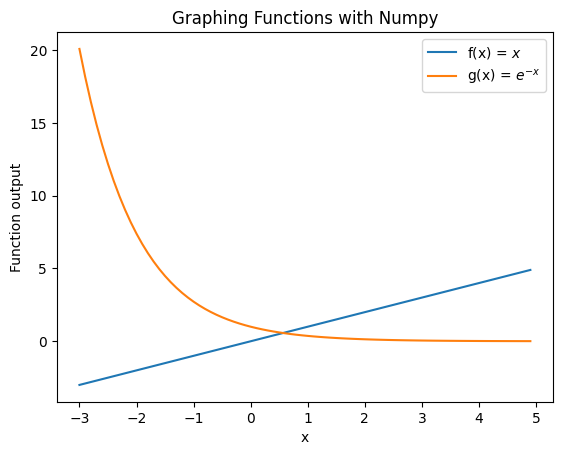

In [18]:
x_vals = np.arange(-3, 5, 0.1)

plt.plot(x_vals, f(x_vals), label="f(x) = $x$")
plt.plot(x_vals, g(x_vals), label="g(x) = $e^{-x}$")

plt.xlabel("x")
plt.ylabel("Function output")
plt.title("Graphing Functions with Numpy")

plt.legend()
plt.show()

&#128310; Comment on your plot. Where, approximately, do you expect to find the root $x_0$ of the function $h(x) = f(x) - g(x)$? 

Here our plot describes each our functions visually. Given this graph, we expect to find the root at the intersection of the blue and orange line, which means $x_0 \approx 0.6$.

## The Bisection Method

The bisection method is also called the "binary search" method. It uses a simple premise: if we have some continuous function, and we can guess two starting values that bracket a root of the function, we can iteratively halve the distance between our two values and discard the half that no longer contains the root, until we zoom in on the answer. A more detailed description of the algorithm is as follows:

1. Set a target accuracy for the root you find.
2. Given an initial pair of points $x_1$, $x_2$, check that $f(x_1)$ and $f(x_2)$ have opposite signs.
3. If $f(x')$ has the same sign as $f(x_1)$ then set $x_1 = x'$. Otherwise set $x_2 = x'$.
4. If $\left|x_1 - x_2\right|$ is greater than the target accuracy, repeat from step 2. Otherwise, calculate $\frac{1}{2}\left(x_1 + x_2\right)$ one last time, and use this as the final estimate of the root.

Let's try it out!

### While loops
Before we begin, let's have a quick refresher on `while` loops in Python. The `while` loop will execute a set of statements as long as a condition is true. Consider the following code.

In [19]:
i = -3
while i < 5:
    print(f"i = {i}")
    i += 1

i = -3
i = -2
i = -1
i = 0
i = 1
i = 2
i = 3
i = 4


&#128310; Explain in your own words what the code above does. 

This code looks at the value of i and iterates through the value of i, printing each value starting with -3 and stopping when i = 5. 

### Your own implementation of the bisection method

Now we'll implement the bisection method. You may find while loops will come in handy! Use the comments below to guide your code.

In [20]:
# Implement h(x) = f(x) - g(x)
def h(x):
    return f(x) - g(x)

# Initialize two starting guesses that you suspect bracket your solution
x_guess_min, x_guess_max = 0, 1
x_min, x_max = x_guess_min, x_guess_max

# Implement the bisection method to find the root of h(x) = 0, following the procedure outlined above.
target_accuracy, not_done = 0.01, True
print("signs match") if np.sign(h(x_guess_min)) == np.sign(h(x_guess_max)) else print("signs don't match ✅")

while not_done:

    x_prime = 0.5*(x_min + x_max) # update prime to average

    if np.sign(h(x_min)) == np.sign(h(x_prime)): # increase range if signs are same
        x_min = x_prime 
    else:
        x_max = x_prime

    if not np.abs(x_max - x_min) > target_accuracy:  # check target accuracy
        not_done = False


# Run your code and nicely print the output.
final_estimate = 0.5*(x_min + x_max)
print(final_estimate)

signs don't match ✅
0.56640625


&#128309; Plot $h(x)$, plot a horizontal line at $y=0$ using `plt.axhline`, and plot the root that you found as a vertical line using `plt.axvline`.

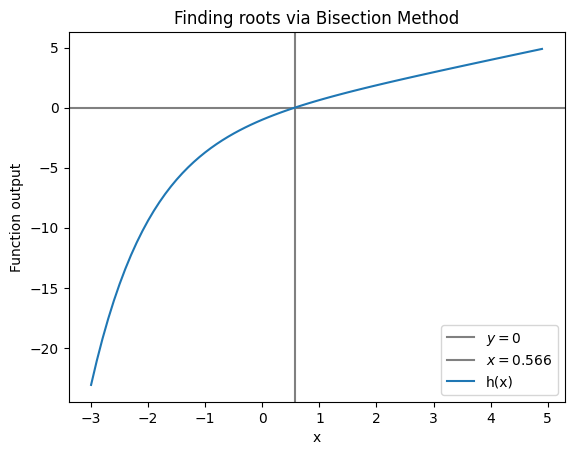

In [21]:
plt.axhline(y=0, label="$y=0$", color="gray")
plt.axvline(x=0.56640625, label="$x=0.566$", color="gray")
plt.plot(x_vals, h(x_vals), label="h(x)")

plt.xlabel("x")
plt.ylabel("Function output")
plt.title("Finding roots via Bisection Method")

plt.legend()
plt.show()

&#128310; Comment on your plot. Did you find the root?

Yes, I think we found the root because our exacted point $(0, 0.56640)$ does seem to intersect the $h(x) = 0$ function.

&#128310; What do you think is the main drawback of the bisection method? How would it fare at finding the roots of $(6-2x)^4$?

One of the main drawbacks must be when you're trying to minimize a function with very quick changes or large derivatives. For the given function, $(6-2x)^4$, it will be really hard to solve given that there is only a single point that ever approaches 0. 

I got to here on 4/23.

I didn't work with anyone because I was sick in class on Thursday. 

I would score my effort a 9/10.

I tried pretty hard and worked through the notebook at a reasonable pace. I hope to continue working on it later and making good progress, specifically focusing on becoming very comfortable and quick with manipulting and creating graphs. 

### Applying the bisection method to Planck's radiation law

Planck's radiation law states that the intensity of radiation per unit area and per unit wavelength $\lambda$ from a blackbody at temperature $T$ is

$$I(\lambda) = \frac{2\pi h c^2 \lambda^{-5}}{e^{hc/\lambda k_B T} - 1}$$

Where $h$ is Planck's constant, $c$ is the speed of light, and $k_B$ is Boltzmann's constant. 

You can show by differentiating that the wavelength at which the emitted ration is strongest is defined by

$$5e^{-hc/\lambda k_B T} + \frac{hc}{\lambda k_B T} - 5 = 0$$

Substitute $x = hc/\lambda k_B T$ and you will see that the wavelength of peak radiation obeys the *Wien displacement law*,

$$\lambda = \frac{b}{T}$$

where the *Wien displacement constant* is $b = hc/k_B x$, and  $x$ is the solution to the nonlinear equation 

$$5e^{-x} + x - 5 = 0$$

&#128309; Write code that solves this to an accuracy of $10^{-6}$ using the bisection method, and report your value of the Wien displacement constant $b$. Use your value to answer the questions below.

In [22]:
# implement the non-linear equation specified
def radiation_law(x):
    return (5*np.e**(-x) + x - 5)

# Initialize two starting guesses that you suspect bracket your solution
x_guess_min, x_guess_max = 4, 6
x_min, x_max = x_guess_min, x_guess_max

# Implement the bisection method to find the root of h(x) = 0, following the procedure outlined above.
target_accuracy, not_done = 0.000001, True
if np.sign(radiation_law(x_guess_min)) == np.sign(radiation_law(x_guess_max)):
    print("min/max guess signs match 🔴") 
else: print("min/max guess signs don't match ✅")

while not_done:

    x_prime = 0.5*(x_min + x_max) # define x'

    if np.sign(radiation_law(x_min)) == np.sign(radiation_law(x_prime)):
        x_min = x_prime # underestimate
    else:
        x_max = x_prime # overestimate

    if not np.abs(x_max - x_min) > target_accuracy: # check if done via target bounds
        not_done = False


# Run your code and nicely print the output.
final_estimate = 0.5*(x_min + x_max)
print("Wien displacement constant b =", final_estimate)

min/max guess signs don't match ✅
Wien displacement constant b = 4.965114116668701


&#128310; The Sun's emitted radiation peaks at $\lambda = 502$ nm. Estimate the surface temperature of the Sun. 

&#128310; You have a body temperature of approximately 310 K. At what wavelength does your thermal radiation peak?

Surface temperature of the sun: $ \lambda = \frac{b}{T} \rightarrow T = \frac{b}{\lambda} \rightarrow T = \frac{4.96511 \text{ mK}}{502 \text{ nm}}$, so $T = \frac{4.96511 * 10^{-3}}{5.02 * 10^{-9}} K = 9890.7 K$

Body thermal radiation peak wavelength: $ \lambda = \frac{b}{T} = \frac{4.96511 \text{ mK}}{310 \text{ K}} = 0.01602 \text{ m}$

## The Newton-Raphson Method

Let's say that we don't know of two points that bracket our function, but we *do* know how the derivative of our function analytically. We can use the Newton-Raphson method, or just "Newton's method", to find a nearby root. The essence of this method is quite simple: at some starting guess $x_0$, evaluate $f'(x_0)$, the tangent line at that point, and use the x-intercept of the tangent line as your new guess. In other words,

$$x_{i + 1} = x_i - \frac{f(x_i)}{f'(x_i)}$$

&#128309;  Implement the Newton-Raphson method below.

In [23]:
def newton_raphson(func, func_deriv, guess):
    # loop and run 10 updates
    for _ in range(10):
        if (func_deriv(guess)) == 0: # divide by zero check
            guess = guess - (func(guess))/0.1
        else:
            guess = guess - (func(guess))/(func_deriv(guess))
    return guess

### The roots of a sixth-order polynomial

Consider the sixth-order polynomial

$$P(x) = 924x^6 - 2772x^5 + 3150x^4 - 1680x^3 + 420x^2 - 42x + 1$$

&#128309; Use the Newton-Raphson method to find all of the roots of this polynomial. 

In [24]:
def func(x): 
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def func_deriv(x): 
    return 5544*x**5 - 13860*x**4 + 12600*x**3 - 5040*x**2 + 840*x - 42

for starting_val in np.arange(0, 1, 0.1):
    print("guess of ", starting_val, " gave ", newton_raphson(func, func_deriv, starting_val))

guess of  0.0  gave  0.03376524289842398
guess of  0.1  gave  0.03376521530870089
guess of  0.2  gave  0.16939530676686765
guess of  0.30000000000000004  gave  0.38069040695840356
guess of  0.4  gave  0.380690406958403
guess of  0.5  gave  1.1890883104773058
guess of  0.6000000000000001  gave  0.6193095930415927
guess of  0.7000000000000001  gave  0.6193095930416039
guess of  0.8  gave  0.830604693233126
guess of  0.9  gave  0.966234784691298


From this, we can predict that the roots are: 
0.0337, 0.1694, 0.3807, 0.6193, 0.8306, and 0.9662, as these are the values our Newton-Raphson converged upon after 10 iterations.

&#128309; Plot your function and your roots. Did it work? Explain your answer. 

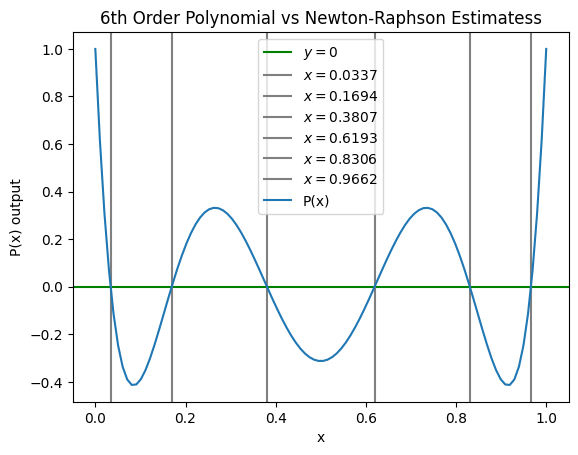

In [25]:
x_axis = np.linspace(-0, 1, num=100)

plt.axhline(y=0, label="$y=0$", color="green")

# x intercepts
plt.axvline(x=0.0337, label="$x=0.0337$", color="gray")
plt.axvline(x=0.1694, label="$x=0.1694$", color="gray")
plt.axvline(x=0.3807, label="$x=0.3807$", color="gray")
plt.axvline(x=0.6193, label="$x=0.6193$", color="gray")
plt.axvline(x=0.8306, label="$x=0.8306$", color="gray")
plt.axvline(x=0.9662, label="$x=0.9662$", color="gray")

plt.plot(x_axis, func(x_axis), label="P(x)")

plt.xlabel("x")
plt.ylabel("P(x) output")
plt.title("6th Order Polynomial vs Newton-Raphson Estimatess")

plt.legend()
plt.show()

Yes! This does seem to work as we can see every intersection of our polynomial, $P(x)$, in blue with the x-axis in green also has a gray line passing through it, representing an estimate of a zero by the Newton-Raphson estimator.

What if we don't know the derivative $f'(x)$ analytically? We can instead approximate the derivative, for instance:

$$f'(x_2) \approx \frac{f(x_2) - f(x_1)}{x_2 - x_1}$$

This is, of course, just a finite-difference derivative version of the Newton-Raphson method, but the same algorithm with this numerical derivative is called the **secant method**. Note that you will need two starting guesses instead of one. 

&#128309; Implement the secant method, and test your code.

In [39]:
def secant(func, guess_min, guess_max, acc):

    while (abs(guess_max - guess_min) > acc): # check if within accuracy

        f_prime = (func(guess_max) - func(guess_min))/(guess_max - guess_min) # calculate f'(x_2)
        temp = guess_max

        guess_max = guess_max - (func(guess_max)/f_prime)  # update x_2
        guess_min = temp

    return guess_max

### Lagrange Points

Equilibrium points in the gravitational field of two massive bodies (e.g., the Sun and the Earth or the Earth and the Moon) are called Lagrange points. We will consider a simplified version of finding the Earth-Sun Lagrange points: we will reduce the problem to a 1D problem by searching for these equilibrium points along the line that instantaneously connects the Sun and the Earth. We will also assume that all orbits are circular. 

Define a coordinate system with the origin at the Sun. We will call this axis $r$. The Sun is at $r = 0$, and the Earth is at $+R_{Earth}$. We often define a handy unit, an "astronomical unit", or AU, that is equal to the distance between the Sun and the Earth. 

Now the equilibrium points will be at 

$$0  = -\frac{GM_{Sun} r}{\left|r\right|^3} - \frac{G M_{Earth} (R_{Earth} - r) }{\left|R_{Earth} - r\right|^3} - \omega^2r $$

<!-- no negative on leading term??? -->

Where $\omega$ is the angular velocity of both the Earth and the Lagrange point, in radians/second. (Hint: you know what to use for this. How long does it take for the Earth to orbit the Sun?)

Here are some handy constants (feel free to work in different units if you prefer):
$$G = 6.674 \times 10^{-11} \mathrm{m}^3 \mathrm{kg}^{-1} \mathrm{s}^{-2}$$
$$M_{Sun} = 1.989 \times 10^{30} \mathrm{kg} $$ 
$$M_{Earth} = 5.972 \times 10^{24} \mathrm{kg} $$ 
$$R_{Earth} = 1.496 \times 10^{11} \mathrm{m} = 1 \mathrm{AU}$$


&#128309; There are three Lagrange points along the Earth-Sun axis. Use either Newton's method or the secant method, and see if you can find them all. Hint: you may need to play around with your starting guesses!

In [37]:
# initalize constants
G = 6.674*10**(-11) # m^3 kg^-1 s^-2
Msun = 1.989*10**(30) # kg
Mearth = 5.972*10**(24) # kg
Rearth = 1.496*10**(11) # m
omega = 1.99*10**(-7) # rad s^-1

def lagrange(r):
    # calculate term by term
    if r == 0:
        r = 1
    term1 = (G * Msun * r)/((abs(r))**3)
    term2 = (G * Mearth * (Rearth - r))/((abs(Rearth - r))**3)
    term3 = r * omega**2

    return term1 - term2 - term3 # return full solution


In [38]:
# brief test to check possible ranges of solutions
for starting_val in np.arange(0, 1, 0.05):
    sol = secant(lagrange, Rearth*starting_val, Rearth*(starting_val+0.05), 1)/Rearth
    print("guess of ", starting_val, " gave ", sol)

guess of  0.0  gave  0.05
guess of  0.05  gave  0.9901589106337134
guess of  0.1  gave  0.9901589106337134
guess of  0.15000000000000002  gave  0.9901589106337134
guess of  0.2  gave  0.9901589106337134
guess of  0.25  gave  0.9901589106337134
guess of  0.30000000000000004  gave  0.9901589106337134
guess of  0.35000000000000003  gave  0.9901589106337134
guess of  0.4  gave  0.9901589106337134
guess of  0.45  gave  0.9901589106337134
guess of  0.5  gave  0.9901589106337134
guess of  0.55  gave  0.9901589106337134
guess of  0.6000000000000001  gave  0.9901589106337134
guess of  0.65  gave  0.9901589106337134
guess of  0.7000000000000001  gave  0.9901589106337134
guess of  0.75  gave  0.9901589106337134
guess of  0.8  gave  0.9901589106337134
guess of  0.8500000000000001  gave  0.9901589106337134
guess of  0.9  gave  0.9901589106337134
guess of  0.9500000000000001  gave  nan


/var/folders/9r/sw7rn4810sjddctl8q8nlcy80000gn/T/ipykernel_52701/1903698481.py:13: RuntimeWarning: invalid value encountered in scalar divide
  term2 = (G * Mearth * (Rearth - r))/((abs(Rearth - r))**3)


In [41]:
print("L2 Position: ", secant(lagrange, 10**9, 10**12, 1)) # guess for L_2 (151.1*10^9 m)
print("L_3 Position: ", secant(lagrange, -10**4, -10**6, 1)) # guess for L_3 (-149.6*10^9 m)
print("L_1 Position: ", secant(lagrange, 10**9, 2*10**9, 1)) # guess for L_1 (-148.1*10^9 m)

L2 Position:  151122034033.44043
L_3 Position:  -149659762921.97894
L_1 Position:  148127773030.80353


Many a satellite orbits at L2 (Lagrange point 2), including <a href="https://webbtelescope.org/contents/media/images/01F4STZH25YJH07WTN7XJYQP8P#:~:text=L2%20is%20one%20of%20five,length%20of%20year)%20as%20Earth." target="_blank">JWST</a>. 

## Acknowledgments

S.E. Clark 2024, with several parts adapted from Newman 2013 and from PICUP.
